In [ ]:
# It's pretty cool

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Created Helper Functions
import wrangle as w 

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_fatal = pd.read_excel('data.xlsx')
df_fatal

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48
0,Kalon Horton,29,Male,Black,NaN,2021-05-09,NaN,Lancaster,TX,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Name withheld by police,NaN,Male,Unknown Race,NaN,2021-05-09,90 S. Main St.,Leicester,MA,1524.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Jeffrey Mark Murray,62,Male,Unknown Race,NaN,2021-05-09,NaN,Greenville,SC,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Everton Brown,56,Male,Unknown Race,NaN,2021-05-08,NaN,Baltimore,MD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Felix Jerry Marquez,34,Male,Hispanic,NaN,2021-05-08,NaN,Riverside,CA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9142,Abel Gurrola,26,Male,Hispanic,http://www.bakersfieldnow.com/news/local/A-26-...,2013-01-01,720 Terrace Way,Bakersfield,CA,93304.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9143,Christopher Tavares,21,Male,Hispanic,http://www.krdo.com/image/view/-/17980228/medR...,2013-01-01,Highway 50 and North Elizabeth Street,Pueblo,CO,81008.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9144,Mark Chavez,49,Male,Hispanic,http://www.tricitytribuneusa.com/wp-content/up...,2013-01-01,912 Loma Linda Ave.,Farmington,NM,87401.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9145,Andrew L. Closson,21,Male,White,http://www.superiortelegram.com/sites/default/...,2013-01-01,U.S. Highway 53,Gordon,WI,54838.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_fatal.isnull().sum()

Victim's name                                                                                                                                                                    0
Victim's age                                                                                                                                                                     9
Victim's gender                                                                                                                                                                 10
Victim's race                                                                                                                                                                    0
URL of image of victim                                                                                                                                                        4265
Date of Incident (month/day/year)                                                                        

In [ ]:
useless_columns = df_fatal.columns[35:]

In [ ]:
df_fatal.drop(columns=useless_columns, inplace=True)

In [ ]:
df_fatal.isnull().sum()

Victim's name                                                                                                                                                                    0
Victim's age                                                                                                                                                                     9
Victim's gender                                                                                                                                                                 10
Victim's race                                                                                                                                                                    0
URL of image of victim                                                                                                                                                        4265
Date of Incident (month/day/year)                                                                        

In [ ]:
df_fatal['Cause of death'].value_counts()

Gunshot                                    8434
Gunshot, Taser                              273
Taser                                       250
Vehicle                                      48
Physical Restraint                           33
Beaten                                       31
Tasered                                      21
Physical restraint                            9
Asphyxiated                                   9
Other                                         6
Gunshot, Police Dog                           5
Gunshot, Pepper Spray                         4
Pepper Spray                                  4
Bean bag                                      2
Taser, Physical Restraint                     2
Gunshot, Unspecified Less Lethal Weapon       1
Gunshot, Stabbed                              1
Gunshot, Beanbag Gun                          1
Gunshot, Taser, Beanbag Shotgun               1
Baton, Pepper Spray, Physical Restraint       1
Gunshot, Bean Bag Gun                   

In [ ]:
df_fatal['Official disposition of death (justified or other)'].value_counts()


Pending investigation/No Known Charges                                                                                                   4852
Unreported                                                                                                                               1223
Pending investigation                                                                                                                    1087
Justified                                                                                                                                 651
Justified by District Attorney                                                                                                            350
                                                                                                                                         ... 
Charged, Convicted of murder, Sentenced to 10 years in prison                                                                               1
Charge

In [ ]:
df_fatal['Criminal Charges?'].value_counts()

No known charges                                                                 8993
Charged with a crime                                                               67
Charged, Acquitted                                                                 32
Charged, Charges Dropped                                                            7
Charged, Mistrial                                                                   6
Charged, Convicted                                                                  5
Charged, Convicted, Sentenced to life in prison                                     2
Charged, Convicted, Sentenced to 30 years in prison                                 2
Charged, Convicted, Sentenced to 5 years probation.                                 2
Charged, Convicted, Sentenced to 10 years in prison                                 2
Charged, Convicted, Sentenced to Life in Prison                                     1
Charged, Convicted, Sentenced to life in prison withou

In [ ]:
df_fatal['Body Camera (Source: WaPo)'].value_counts()

No                    5044
Yes                    615
no                     261
yes                     46
Surveillance Video       5
Bystander Video          4
Surveillance video       2
Dashcam Video            2
surveillance video       1
Dashcam video            1
cell phone video         1
Name: Body Camera (Source: WaPo), dtype: int64

In [ ]:
df_fatal['Known Past Shootings of Officer(s) (DRAFT)'].value_counts()

1       50
2       11
3        5
None     5
4        2
No       1
Name: Known Past Shootings of Officer(s) (DRAFT), dtype: int64

In [ ]:
df_fatal[df_fatal['Known Past Shootings of Officer(s) (DRAFT)'] == 4]

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID,Encounter Type (DRAFT),Initial Reported Reason for Encounter (DRAFT),Names of Officers Involved (DRAFT),Race of Officers Involved (DRAFT),Known Past Shootings of Officer(s) (DRAFT),Call for Service? (DRAFT)
1187,Leah Baker,29,Female,White,NaN,2020-04-11,1300 Golfair Boulevard,Jacksonville,FL,32209.0,...,NaN,Urban,7968.0,27858.0,Domestic Disturbance,Domestic Disturbance-cohabitants (roommates),"E. Meckling, J.C. Nobles (fired shots)",NaN,4,Yes
3396,Mark Powell,39,Male,Unknown Race,NaN,2018-04-10,850 E Fort Lowell Rd,Tucson,AZ,85719.0,...,NaN,Suburban,5752.0,24060.0,Part 1 Violent Crime,Robbery,Jeffrey Stover,White,4,Yes


In [ ]:
df_fatal['Body Camera (Source: WaPo)'] = df_fatal['Body Camera (Source: WaPo)'].str.replace('yes', 'Yes').str.replace('no', 'No')

In [ ]:
df_fatal['Body Camera (Source: WaPo)'].value_counts(dropna=False)

No                    5305
NaN                   3165
Yes                    661
Surveillance Video       5
Bystander Video          4
Surveillance video       2
Dashcam Video            2
surveillance video       1
Dashcam video            1
cell phone video         1
Name: Body Camera (Source: WaPo), dtype: int64

In [ ]:
#testing git hub push

In [ ]:
#testing push
df_fatal.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID,Encounter Type (DRAFT),Initial Reported Reason for Encounter (DRAFT),Names of Officers Involved (DRAFT),Race of Officers Involved (DRAFT),Known Past Shootings of Officer(s) (DRAFT),Call for Service? (DRAFT)
0,Kalon Horton,29,Male,Black,NaN,2021-05-09,NaN,Lancaster,TX,NaN,...,NaN,NaN,NaN,NaN,Part 1 Violent Crime,gunshots,NaN,NaN,NaN,Yes
1,Name withheld by police,NaN,Male,Unknown Race,NaN,2021-05-09,90 S. Main St.,Leicester,MA,1524.0,...,NaN,Suburban,NaN,NaN,Other,deliberate car crash,NaN,NaN,NaN,Yes
2,Jeffrey Mark Murray,62,Male,Unknown Race,NaN,2021-05-09,NaN,Greenville,SC,NaN,...,NaN,NaN,NaN,NaN,Part 1 Violent Crime,murder,NaN,NaN,NaN,Yes
3,Everton Brown,56,Male,Unknown Race,NaN,2021-05-08,NaN,Baltimore,MD,NaN,...,NaN,NaN,NaN,NaN,Part 1 Violent Crime,murder,NaN,NaN,NaN,Yes
4,Felix Jerry Marquez,34,Male,Hispanic,NaN,2021-05-08,NaN,Riverside,CA,NaN,...,NaN,NaN,NaN,NaN,Person with a gun,person with a gun,NaN,NaN,NaN,No


In [ ]:
df_fatal['Fleeing (Source: WaPo)'].value_counts()

Not fleeing     3794
Car              963
Foot             752
Other            181
not fleeing      176
foot              65
car               51
Not Fleeing       47
other             24
not fleeing        3
Name: Fleeing (Source: WaPo), dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

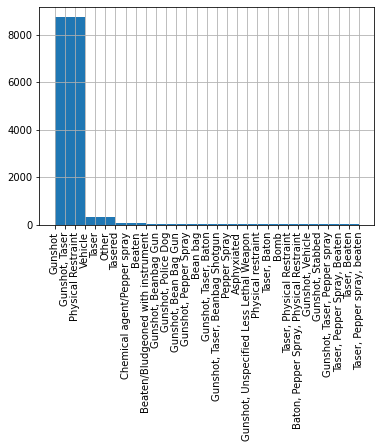

In [ ]:
df_fatal['Cause of death'].hist()
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

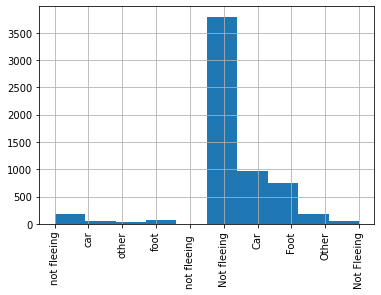

In [ ]:
df_fatal['Fleeing (Source: WaPo)'].hist()
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

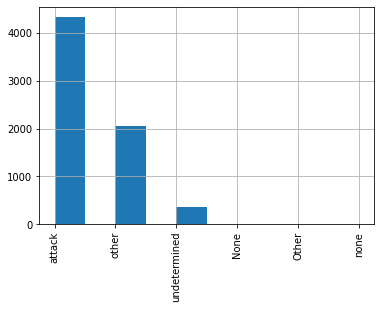

In [ ]:
df_fatal['Alleged Threat Level (Source: WaPo)'].hist()
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

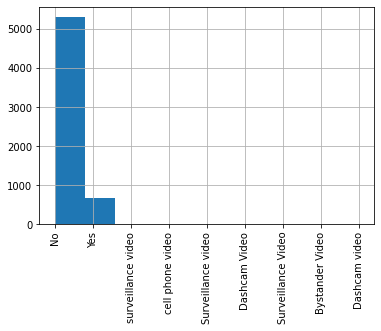

In [ ]:
df_fatal['Body Camera (Source: WaPo)'].hist()
plt.xticks(rotation='vertical')

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

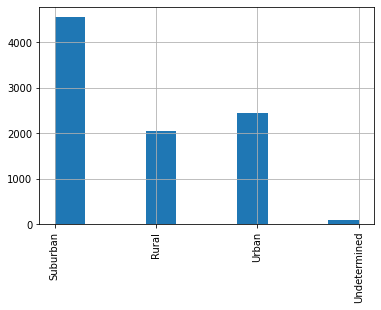

In [ ]:
df_fatal['Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )'].hist()
plt.xticks(rotation='vertical')

# Project Description and Goals
Across the United States, there are altercations that result in killings by police officers, whether on-duty or off-duty. Each case is considered as a person dying from being shot, beaten, restrained, intentionally hit by a police vehicle, pepper sprayed, tasered, or otherwise harmed by police. 

For our capstone, we are addressing the issue of police violence that has become a heated topic throughout the country in the recent years. As a team, we will be attempting to help law enforcement agencies spot risk factors so they may step in before risk transforms into actual harm.  

The open-sourced dataset we acquired from [Mapping Police Violence](https://mappingpoliceviolence.org/aboutthedata) has gathered over 9000 police killings from January 2013 to May 2021. Top drivers of civilian fatalities identified will shed light on changes to be made to save more lives. Then, we will use the features to apply to our classification models predicting the threat level of the victim (attacker or not).

### Objectives for this project include:
- Identifying the drivers of civilian fatalities. 
- Documenting the process and analysis throughout the data science pipeline.
- Constructing a classification model that can predict what the victim's threat level is, given the features of the dataset.
- Deliverables:
    - README.md file containing overall project information. 
    - A well-documented jupyter notebook detailing the data science pipeline process.
    - Python modules that automate the data acquisition, preparation, and exploration process.

### Pipeline Process:
1. Acquire
2. Prepare
3. Explore
4. Model/Evaluate
5. Deliver

### Initial Hypotheses:
- How many fatalities happened as a result of an attack by the civilian? (alleged threat level)
- What are the fatalities by state: % killings vs pop
- Is race a factor?
- Does the police officer having a bodycam make a difference?
- Where and what areas result in more killings?
- What is happening in suburban fatalities?
- Do symptoms of mental illness play a role in threat level?


***
### Project Imports


***
# Data Acquisition

### Findings
- what was messy and how it is going to be cleaned

*** 
# Data Preparation
- df from prepare and verify no nulls, shape, etc.
- split data

*** 
# Data Exploration
- answer questions from initial hypotheses
- write takeaways for each visual

***
# Data Modeling and Evaluation
- set up X inputs and y target variables for each split
- establish baseline prediction (mode) and baseline accuracy model
- fit/transform/evaluate various classification algorithms and specify different feature selection/hyperparameters
- compare baseline and train scores
- select top 3 (?) models on training data to compare train scores to validate scores
- select top model to test and then write takeaways in conclusion

***
# Conclusion
### Takeaways 
- overall from modeling and from any other additional takeaways from project as a whole
- possible recommendations: May include finding more appropriate interventions or training courses, or filling in detailed information, leaving none out in order to learn how to be better each time.

### Next Steps

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=258e71fc-cf2b-48c3-8461-70ecd9787aa1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>